In [0]:
# 基本処理ライブラリ
import pandas as pd
import numpy as np

# データ可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習ライブラリ
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [0]:
# 特徴量作成
x = np.array([20, 30, 100, 120, 220, 240])
x = x[:,None].astype('float64')

# ターゲット作成
y = np.array([10, 30, 120, 110, 80, 70])
y = y[:,None].astype('float64')

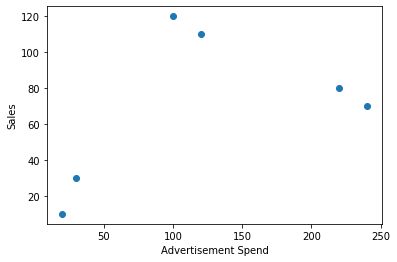

In [0]:
# 特等量とターゲットを可視化
plt.scatter(x,y, marker='o')
plt.xlabel("Advertisement Spend")
plt.ylabel("Sales")
plt.show()

In [0]:
# ステージ1 推測値（yの平均）
y_mean = y.mean()
y_mean = np.full((6,1),y_mean)
M1_pred = y_mean.copy()
M1_pred

array([[70.],
       [70.],
       [70.],
       [70.],
       [70.],
       [70.]])

In [0]:
# ステージ1 残差（実際の値 - 推測値）
error_1 = y.reshape(6,1) - y_mean
error_1

array([[-60.],
       [-40.],
       [ 50.],
       [ 40.],
       [ 10.],
       [  0.]])

In [0]:
# ステージ1の確認
table = pd.DataFrame({
    '広告費':x[:,0],
    '売上': y[:,0],
    'M1推測': M1_pred[:,0],
    'M1残差': error_1[:,0]},
    index=["A","B","C","D","E","F"]
)
# テーブル表示
table[['広告費', '売上', 'M1推測', 'M1残差']]

,広告費,売上,M1推測,M1残差
A,20.0,10.0,70.0,-60.0
B,30.0,30.0,70.0,-40.0
C,100.0,120.0,70.0,50.0
D,120.0,110.0,70.0,40.0
E,220.0,80.0,70.0,10.0
F,240.0,70.0,70.0,0.0


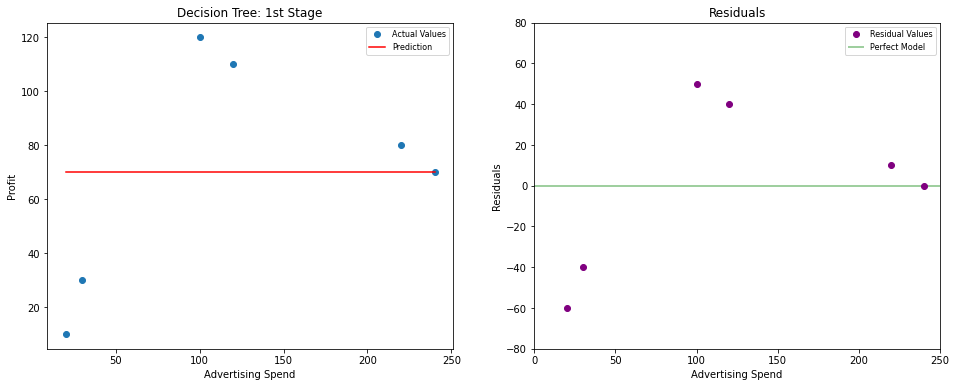

In [0]:
# ステージ1の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# 予測のプロット
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x, M1_pred, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Stage')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# 誤差のプロット
ax2.plot(x, error_1, 'o', color='purple',label='Residual Values')
ax2.set_xlim(0,250)
ax2.set_ylim(-80,80)
ax2.hlines(y=0, xmin=0, xmax=300, color='g', alpha=0.5, label='Perfect Model')
ax2.set_title('Residuals')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Residuals')
ax2.legend(fontsize=8)

In [0]:
# ステージ2のモデル構築（M_2）
M2 = DecisionTreeRegressor(max_depth=1)
M2 = M2.fit(x, error_1)
M2_output = M2.predict(x)

In [0]:
M1_pred

array([[70.],
       [70.],
       [70.],
       [70.],
       [70.],
       [70.]])

In [0]:
# ステージ2の推測値
M2_pred = M1_pred + M2_output.reshape(6, 1)
M2_pred

array([[20.],
       [20.],
       [95.],
       [95.],
       [95.],
       [95.]])

In [0]:
error_2 = y.reshape(6, 1) - M2_pred
error_2

array([[-10.],
       [ 10.],
       [ 25.],
       [ 15.],
       [-15.],
       [-25.]])

In [0]:
# ステージ2の確認
stage_2 = pd.DataFrame({
    'M2出力': M2_output.reshape(6, 1)[:,0],
    'M2推測': M2_pred.reshape(6, 1)[:,0],
    'M2残差': error_2[:,0]},
    index=["A","B","C","D","E","F"]
)
stage_2 = pd.concat([table, stage_2], axis=1)
# テーブル表示
stage_2[['広告費', '売上', 'M1推測', 'M1残差', 'M2出力', 'M2推測', 'M2残差']]

,広告費,売上,M1推測,M1残差,M2出力,M2推測,M2残差
A,20.0,10.0,70.0,-60.0,-50.0,20.0,-10.0
B,30.0,30.0,70.0,-40.0,-50.0,20.0,10.0
C,100.0,120.0,70.0,50.0,25.0,95.0,25.0
D,120.0,110.0,70.0,40.0,25.0,95.0,15.0
E,220.0,80.0,70.0,10.0,25.0,95.0,-15.0
F,240.0,70.0,70.0,0.0,25.0,95.0,-25.0


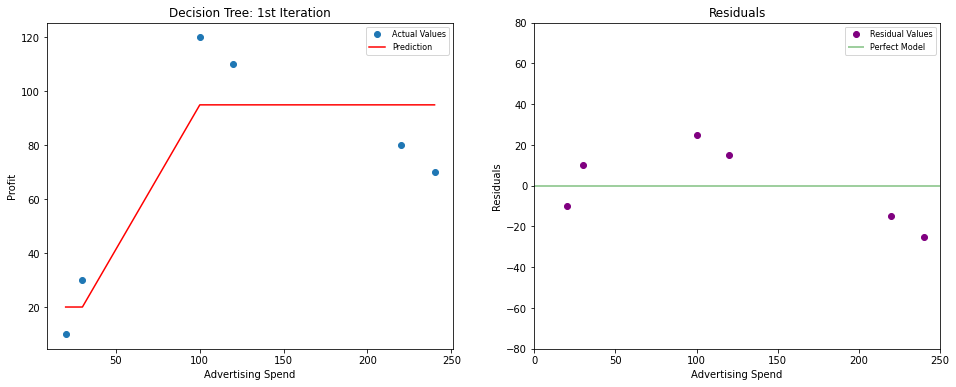

In [0]:
# ステージ2の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# 予測のプロット
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x, M2_pred, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# 誤差のプロット
ax2.plot(x, error_2, 'o', color='purple',label='Residual Values')
ax2.set_xlim(0,250)
ax2.set_ylim(-80,80)
ax2.hlines(y=0, xmin=0, xmax=300, color='g', alpha=0.5, label='Perfect Model')
ax2.set_title('Residuals')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Residuals')
ax2.legend(fontsize=8)

In [0]:
# 特徴量を水増し（6つから300個へ）
x_mock = np.linspace(0,299,300)
x_mock = x_mock.reshape(300, 1)

# X_mockで予測
M2_output_mock = M2.predict(x_mock)
M1_pred_mock = y.mean()
M1_pred_mock = np.full((300,1),M1_pred_mock)
M2_pred_mock = M1_pred_mock + M2_output_mock.reshape(300,1)

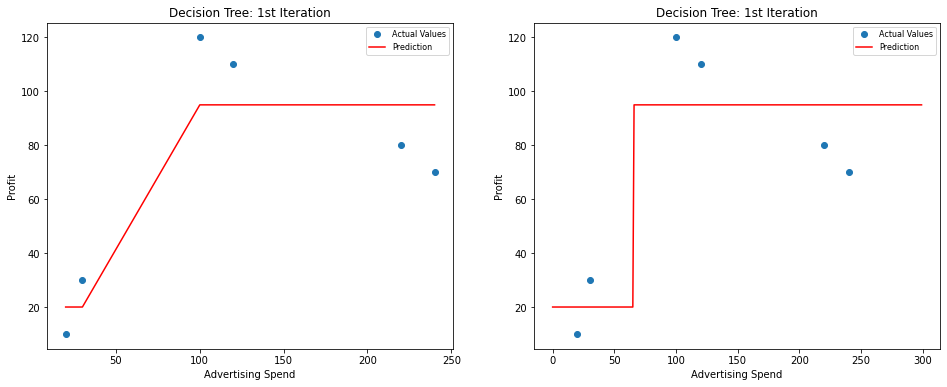

In [0]:
# ステージ2の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# 実際のデータでモデルを可視化
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x, M2_pred, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# 水増しデータでモデルを可視化
ax2.plot(x, y, 'o', label='Actual Values')
ax2.plot(x_mock, M2_pred_mock, 'r', label='Prediction')
ax2.set_title('Decision Tree: 1st Iteration')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Profit')
ax2.legend(fontsize=8)

In [0]:
# ステージ3のモデル構築（M_3）
M3 = DecisionTreeRegressor(max_depth=1)
M3 = M3.fit(x, error_2)
M3_output = M3.predict(x)

In [0]:
# ステージ3の推測値
M3_pred = M2_pred + M3_output.reshape(6, 1)

# ステージ3の残差を計算
error_3 = y.reshape(6, 1) - M3_pred

In [0]:
# ステージ3の確認
stage_3 = pd.DataFrame({
    'M3出力': M3_output.reshape(6, 1)[:,0],
    'M3推測': M3_pred.reshape(6, 1)[:,0],
    'M3残差': error_3[:,0]},
    index=["A","B","C","D","E","F"]
)
stage_3 = pd.concat([stage_2, stage_3], axis=1)
# テーブル表示
stage_3[['広告費', '売上', 'M1推測', 'M1残差', 'M2出力', 'M2推測', 'M2残差', 'M3出力', 'M3推測', 'M3残差']]

,広告費,売上,M1推測,M1残差,M2出力,M2推測,M2残差,M3出力,M3推測,M3残差
A,20.0,10.0,70.0,-60.0,-50.0,20.0,-10.0,10.0,30.0,-20.0
B,30.0,30.0,70.0,-40.0,-50.0,20.0,10.0,10.0,30.0,0.0
C,100.0,120.0,70.0,50.0,25.0,95.0,25.0,10.0,105.0,15.0
D,120.0,110.0,70.0,40.0,25.0,95.0,15.0,10.0,105.0,5.0
E,220.0,80.0,70.0,10.0,25.0,95.0,-15.0,-20.0,75.0,5.0
F,240.0,70.0,70.0,0.0,25.0,95.0,-25.0,-20.0,75.0,-5.0


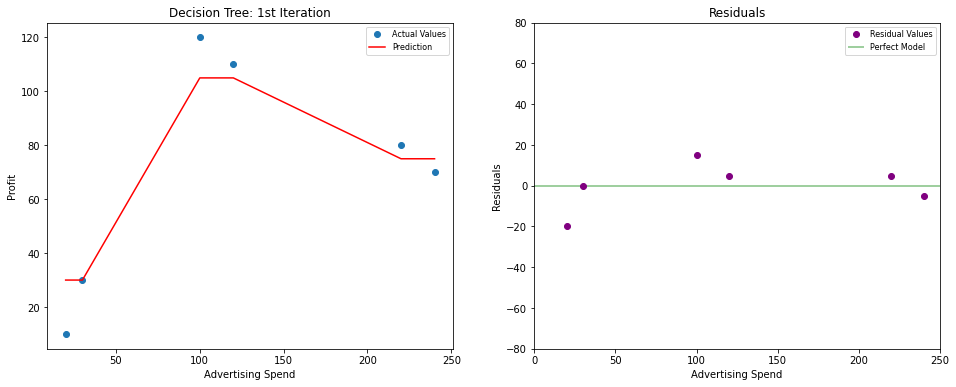

In [0]:
# ステージ3の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# 予測のプロット
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x, M3_pred, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# 誤差のプロット
ax2.plot(x, error_3, 'o', color='purple',label='Residual Values')
ax2.set_xlim(0,250)
ax2.set_ylim(-80,80)
ax2.hlines(y=0, xmin=0, xmax=300, color='g', alpha=0.5, label='Perfect Model')
ax2.set_title('Residuals')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Residuals')
ax2.legend(fontsize=8)


In [0]:
#ステージ3 X_mockで予測
M3_output_mock = M3.predict(x_mock)
M3_pred_mock = M2_pred_mock + M3_output_mock.reshape(300,1)

Text(0, 0.5, 'Profit')

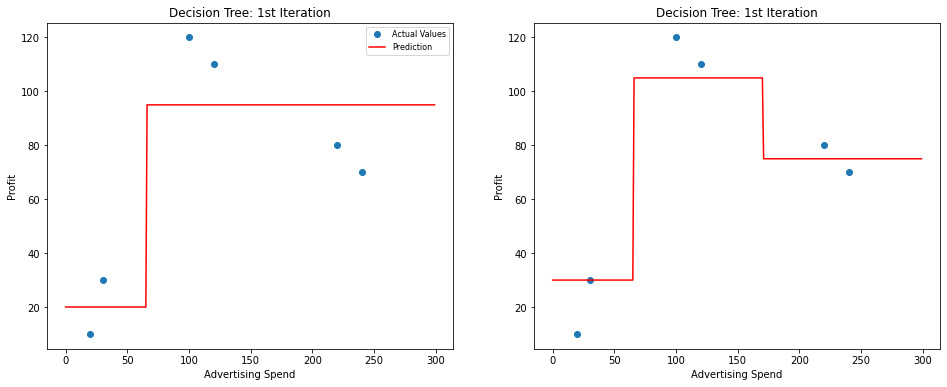

In [0]:
# ステージ３の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# ステージ2 モデル
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x_mock, M2_pred_mock, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# ステージ3 モデル
ax2.plot(x, y, 'o', label='Actual Values')
ax2.plot(x_mock, M3_pred_mock, 'r', label='Prediction')
ax2.set_title('Decision Tree: 1st Iteration')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Profit')

In [0]:
# ステージ4のモデル構築（M_4）
M4 = DecisionTreeRegressor(max_depth=1)
M4 = M4.fit(x, error_3)
M4_output = M4.predict(x)

In [0]:
# ステージ4の推測値
M4_pred = M3_pred + M4_output.reshape(6, 1)

# ステージ3の残差を計算
error_4 = y.reshape(6, 1) - M4_pred

In [0]:
# ステージ4の確認
stage_4 = pd.DataFrame({
    'M4出力': M4_output.reshape(6, 1)[:,0],
    'M4推測': M4_pred.reshape(6, 1)[:,0],
    'M4残差': error_4[:,0]},
    index=["A","B","C","D","E","F"]
)
stage_4 = pd.concat([stage_3, stage_4], axis=1)
# テーブル表示
stage_4[['広告費', '売上', 'M1推測', 'M1残差', 'M2出力', 'M2推測', 'M2残差',
         'M3出力', 'M3推測', 'M3残差', 'M4出力', 'M4推測', 'M4残差']]

,広告費,売上,M1推測,M1残差,M2出力,M2推測,M2残差,M3出力,M3推測,M3残差,M4出力,M4推測,M4残差
A,20.0,10.0,70.0,-60.0,-50.0,20.0,-10.0,10.0,30.0,-20.0,-20.0,10.0,0.0
B,30.0,30.0,70.0,-40.0,-50.0,20.0,10.0,10.0,30.0,0.0,4.0,34.0,-4.0
C,100.0,120.0,70.0,50.0,25.0,95.0,25.0,10.0,105.0,15.0,4.0,109.0,11.0
D,120.0,110.0,70.0,40.0,25.0,95.0,15.0,10.0,105.0,5.0,4.0,109.0,1.0
E,220.0,80.0,70.0,10.0,25.0,95.0,-15.0,-20.0,75.0,5.0,4.0,79.0,1.0
F,240.0,70.0,70.0,0.0,25.0,95.0,-25.0,-20.0,75.0,-5.0,4.0,79.0,-9.0


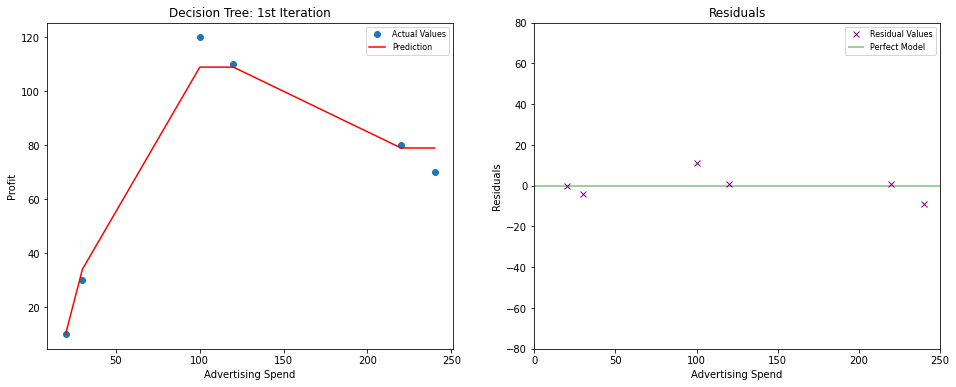

In [0]:
# ステージ4の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# 予測のプロット
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x, M4_pred, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# 誤差のプロット
ax2.plot(x, error_4, 'x', color='purple',label='Residual Values')
ax2.set_xlim(0,250)
ax2.set_ylim(-80,80)
ax2.hlines(y=0, xmin=0, xmax=300, color='g', alpha=0.5, label='Perfect Model')
ax2.set_title('Residuals')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Residuals')
ax2.legend(fontsize=8)

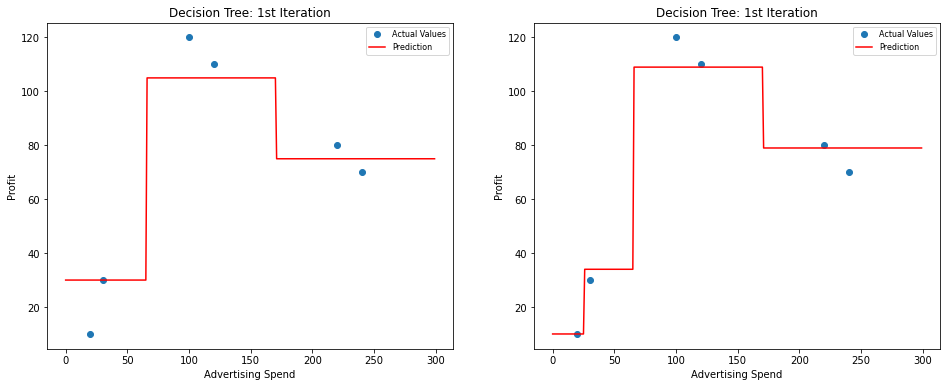

In [0]:
# ステージ3 X_mockで予測
M4_output_mock = M4.predict(x_mock)
M4_pred_mock = M3_pred_mock + M4_output_mock.reshape(300,1)

# ステージ4の結果を可視化
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# ステージ3 モデル
ax1.plot(x, y, 'o', label='Actual Values')
ax1.plot(x_mock, M3_pred_mock, 'r', label='Prediction')
ax1.set_title('Decision Tree: 1st Iteration')
ax1.set_xlabel('Advertising Spend')
ax1.set_ylabel('Profit')
ax1.legend(fontsize=8)

# ステージ4 モデル
ax2.plot(x, y, 'o', label='Actual Values')
ax2.plot(x_mock, M4_pred_mock, 'r', label='Prediction')
ax2.set_title('Decision Tree: 1st Iteration')
ax2.set_xlabel('Advertising Spend')
ax2.set_ylabel('Profit')
ax2.legend(fontsize=8)

In [0]:
# 特徴量作成
x = np.arange(0,100)
x = pd.DataFrame({'x':x})

# ターゲット作成
y1 = np.random.uniform(0,9,20)
y2 = np.random.uniform(20,22,20)
y3 = np.random.uniform(16,19,20)
y4 = np.random.uniform(5,17,20)
y5 = np.random.uniform(11,18,20)
y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

# サイズを確認
y.shape, x.shape

((100, 1), (100, 1))

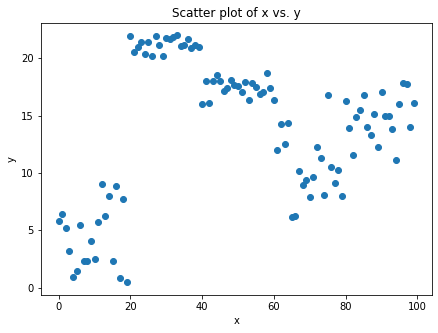

In [0]:
# 散布図の作成
plt.figure(figsize=(7,5))
plt.plot(x,y, 'o')
plt.title("Scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

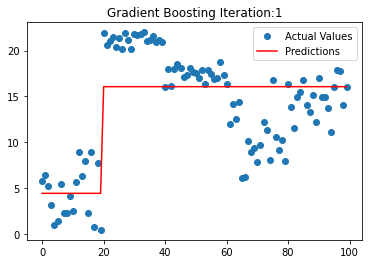

MSE: 15.773445607305266


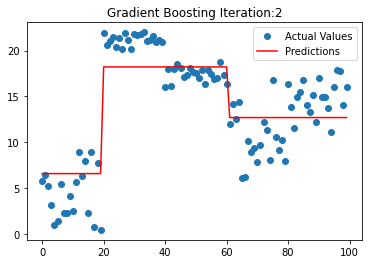

MSE: 8.524868917866941


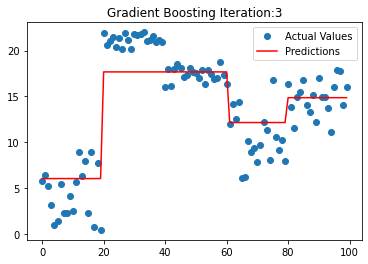

MSE: 7.351638097548675


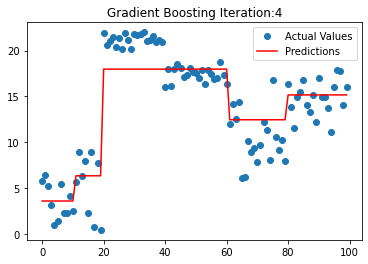

MSE: 6.6098697240928495


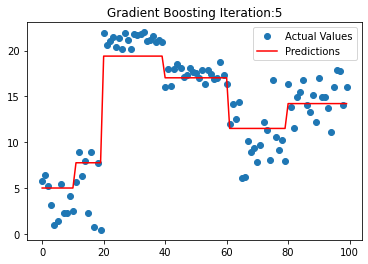

MSE: 5.267037470518443


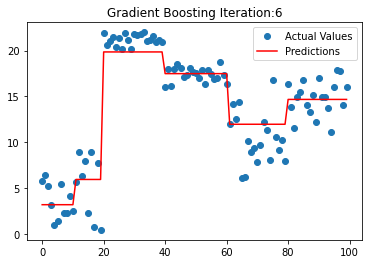

MSE: 4.4396008302342445


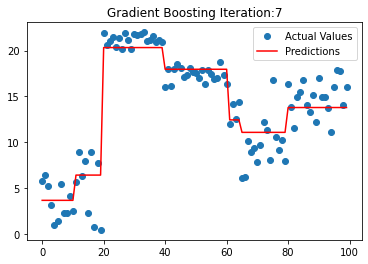

MSE: 4.0192237488201465


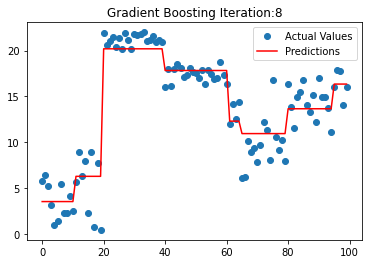

MSE: 3.6751229382068895


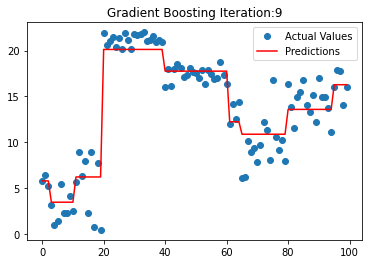

MSE: 3.517814210014969


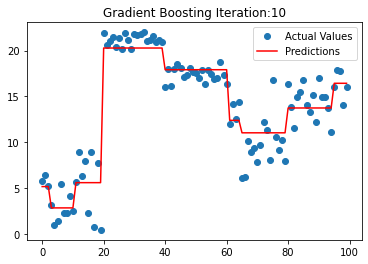

MSE: 3.421652589852025


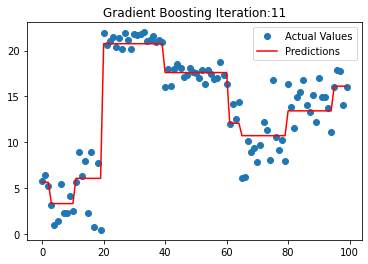

MSE: 3.275024328120044


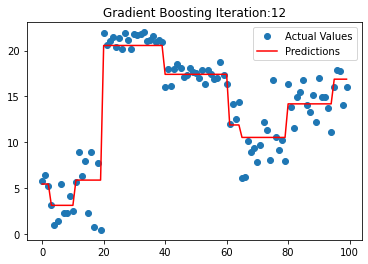

MSE: 3.13017435485848


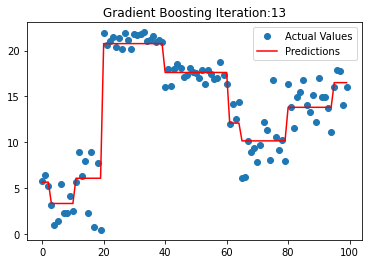

MSE: 3.0540578961606486


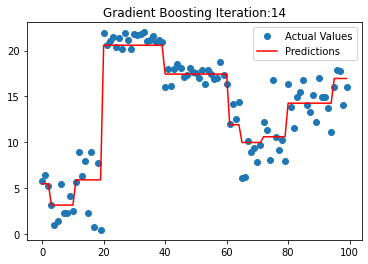

MSE: 2.9750081112695654


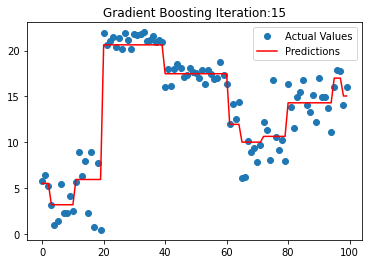

MSE: 2.900694748541332


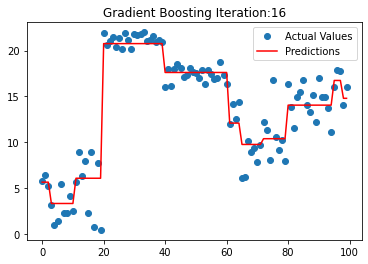

MSE: 2.866148131687189


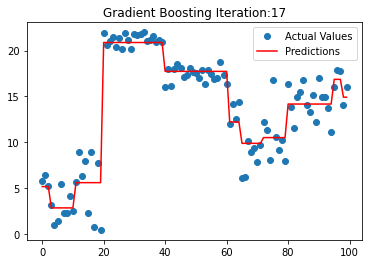

MSE: 2.8082756931547004


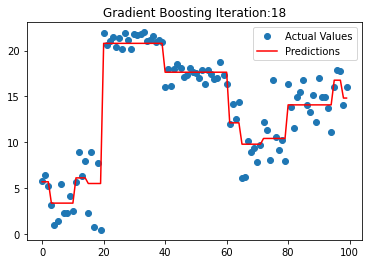

MSE: 2.760491267932317


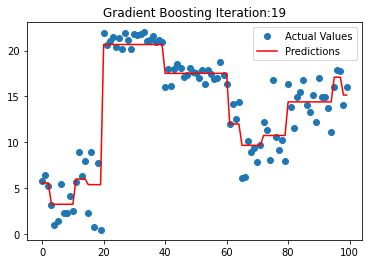

MSE: 2.7194198667933143


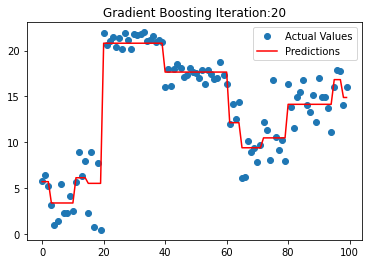

MSE: 2.6821289720035684


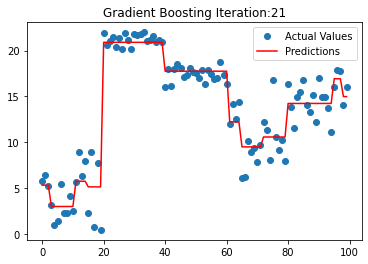

MSE: 2.645526153792097


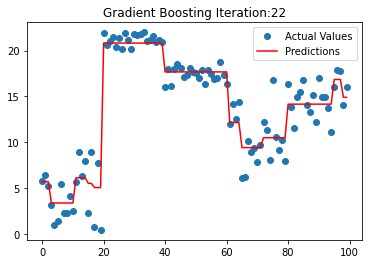

MSE: 2.615943668512864


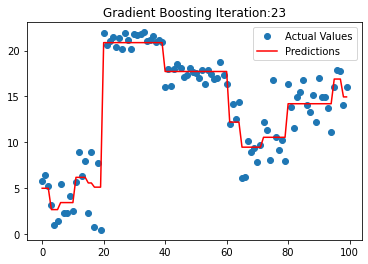

MSE: 2.5829848936400044


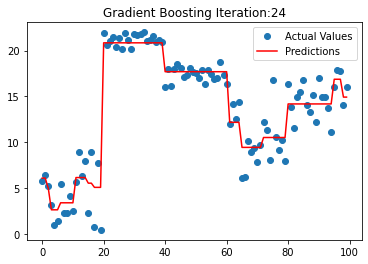

MSE: 2.557829131185666


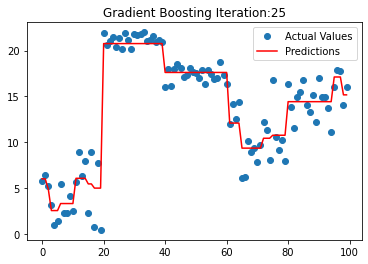

MSE: 2.5375743625749974


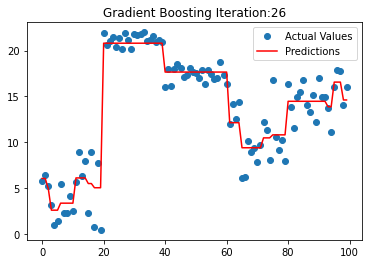

MSE: 2.514158191292767


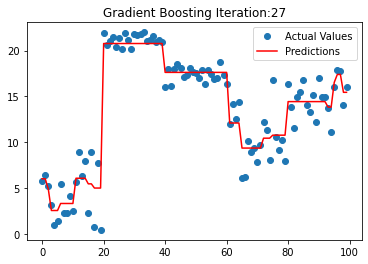

MSE: 2.4851800071434424


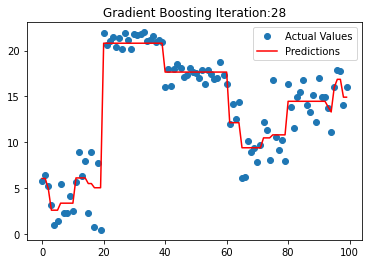

MSE: 2.4671886259572022


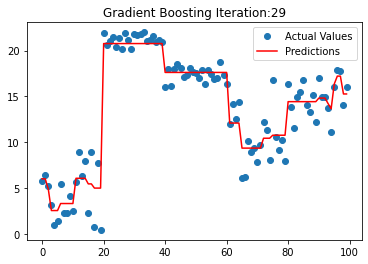

MSE: 2.4534666568960484


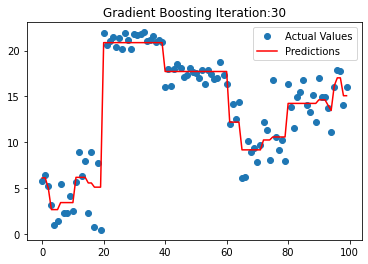

MSE: 2.4340748068192664


In [0]:
# データのサイズを取得
n = len(y)

# 推測値の初期値（全て0と設定）
y_pred_i = np.zeros(n)

for i in range(30):
    DT = DecisionTreeRegressor(max_depth=1)
    error = y.reshape(100, 1) - y_pred_i.reshape(100, 1)
    DT = DT.fit(x, error)
    y_pred_n = DT.predict(x)
    y_pred_i = y_pred_n + y_pred_i
    
    plt.plot(x, y, 'o', label='Actual Values')
    plt.plot(x, np.array(y_pred_i), 'r', label='Predictions')
    label = 'Gradient Boosting Iteration:' + str(i+1)
    plt.title(label)
    plt.legend()
    plt.show()
    print('MSE:', mean_squared_error(y, y_pred_i))

In [0]:
# データ解析のライブラリ
import pandas as pd 
import numpy as np

#　データ可視化のライブラリ
import matplotlib.pyplot as plt

# 機械学習ライブラリ
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

# XGBoost
import xgboost as xgb 
from xgboost import XGBClassifier 

In [0]:
# データセットの読み込み
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [0]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:
# ターゲットのクラス名を確認
print(iris.target_names)

# ターゲットの値を確認
print(set(iris.target))

['setosa' 'versicolor' 'virginica']
{0, 1, 2}


In [0]:
irisdf = pd.DataFrame(iris.data, columns = iris.feature_names)
irisdf['target'] = iris.target
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
# 訓練データとテストデータの分割
train_set, test_set = train_test_split(irisdf, test_size = 0.2, random_state = 42)
print(train_set.shape)
print(test_set.shape)

(120, 5)
(30, 5)


In [0]:
# 特徴量（x）とターゲット（y）に分割
X_train = train_set.drop('target',axis=1)
y_train = train_set['target'].copy()

X_test = test_set.drop('target',axis=1)
y_test = test_set['target'].copy()

In [0]:
# 訓練/テストデータをNumpy配列からDMatrixへ変換
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
print(type(dtrain))
print(type(dtest))

<class 'xgboost.core.DMatrix'>
<class 'xgboost.core.DMatrix'>


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
# XGBoostのハイパーパラメータ 
param = {
    'max_depth': 3,
    'eta': 0.3,
    'silent': 0,
    'objective': 'multi:softprob',
    'num_class': 3
}

In [0]:
# ブースティング反復回数の設定
num_boost_round = 20

In [0]:
# XGBoost モデル訓練
xgboost_model = xgb.train(param, dtrain, num_boost_round)

In [0]:
# 訓練データの推測結果
y_prob = xgboost_model.predict(dtrain)
print(y_prob[0])

[0.990855   0.00562044 0.00352454]


In [0]:
# 確率からターゲットへ変換処理
y_pred = np.asarray([np.argmax(line) for line in y_prob])
y_pred[0:5]

array([0, 0, 1, 0, 0])

In [0]:
# 混同行列を表示（訓練データの推測結果）
confusion_matrix(y_train, y_pred, labels=[0, 1, 2])

array([[40,  0,  0],
       [ 0, 41,  0],
       [ 0,  0, 39]])

In [0]:
# テストデータを使って予測
y_prob_test = xgboost_model.predict(dtest)

# 確率から各クラスへ変換処理
y_pred_test = np.asarray([np.argmax(line) for line in y_prob_test])

In [0]:
# テストデータの推測結果（混同行列）
confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [0]:
xgboost_model.get_score(importance_type='gain')

{'petal length (cm)': 4.040910075674726,
 'petal width (cm)': 2.2534056155522717,
 'sepal length (cm)': 0.15959341158947368,
 'sepal width (cm)': 0.3346610309333333}

In [0]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [0]:
# モデル訓練
xgboost_model_2 = XGBClassifier()
xgboost_model_2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# 二日目

In [0]:
# データ解析のライブラリ
import pandas as pd
import numpy as np 

# データ可視化のライブラリ
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline 

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV 

# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

# その他
from math import sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!wget https://www.codexa.net/wp-content/uploads/2018/10/concrete_data.csv

--2020-04-02 12:09:07--  https://www.codexa.net/wp-content/uploads/2018/10/concrete_data.csv
Resolving www.codexa.net (www.codexa.net)... 13.115.61.79, 13.114.158.97
Connecting to www.codexa.net (www.codexa.net)|13.115.61.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58253 (57K) [application/octet-stream]
Saving to: ‘concrete_data.csv’

concrete_data.csv   100%[===================>]  56.89K  --.-KB/s    in 0.04s   

2020-04-02 12:09:08 (1.46 MB/s) - ‘concrete_data.csv’ saved [58253/58253]



In [0]:
!ls

concrete_data.csv  sample_data


In [0]:
# CSVファイルの読み込み
concrete = pd.read_csv("concrete_data.csv")
print(concrete.shape)
concrete.head()

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [0]:
# データセットのカラム名を変更
concrete.columns = ['cement', 'slag', 'flyash', 'water',
                    'superplasticizer', 'coarseaggregate',
                    'fineaggregate', 'age', 'csMPa']

# 改めて確認
concrete[0:2]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


In [0]:
# 要約統計量を確認
concrete.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [0]:
from scipy import stats

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


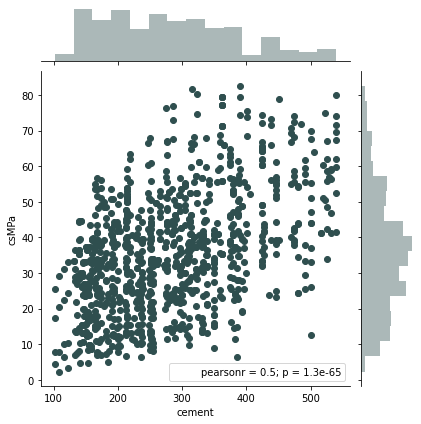

In [0]:
g = sns.jointplot('cement', 'csMPa', data = concrete, kind='scatter', color='darkslategray').annotate(stats.pearsonr)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


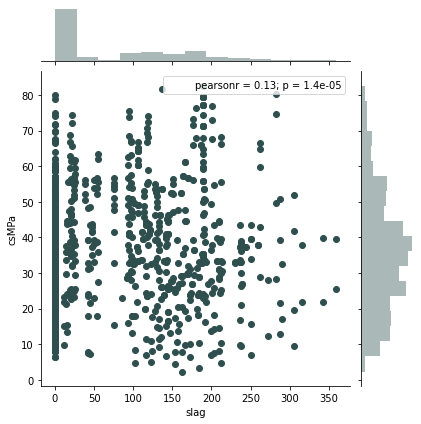

In [0]:
# slagとcsMPaの散布図（スキャタープロット）を作成
sns.jointplot('slag', 'csMPa',data=concrete, kind='scatter', color='darkslategray').annotate(stats.pearsonr)

In [0]:
train_set, test_set = train_test_split(concrete, test_size=.2, random_state=42)

In [0]:
# 特徴量とターゲットへデータを分割
X_train = train_set.drop('csMPa',axis=1)
y_train = train_set['csMPa'].copy()

X_test = test_set.drop('csMPa',axis=1)
y_test = test_set['csMPa'].copy()

In [0]:
# XGBRegressor()のインスタンス生成
xgboost_base = XGBRegressor()

# 訓練データを使ってモデル訓練
xgboost_base.fit(X_train, y_train)

[12:09:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
# テストデータを使って推測結果出力
y_pred_test = xgboost_base.predict(X_test)

In [0]:
# テストデータの推測結果（最初の５レコード）
print(y_pred_test[0:5])

# テストデータの正解値（最初の5レコード）
print(y_test[0:5].values)

[49.388134 45.155766 69.9516   34.783825 13.44883 ]
[52.91 55.9  74.5  35.3  10.54]


In [0]:
# ベースラインモデルのRMSE算出
sqrt(mean_squared_error(y_test, y_pred_test))

5.408634650277012

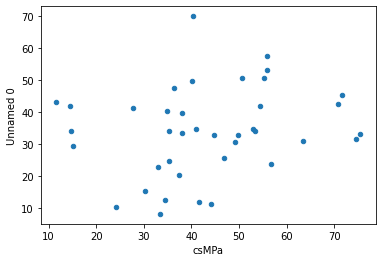

In [0]:
pd.DataFrame([y_test, y_pred_test]).T.plot.scatter(x="csMPa", y="Unnamed 0")

# 3日目

In [0]:
# 調整するn_estimatorsの値の候補を設定
test_params = {
 'n_estimators':[100,200,300,400,500]
}

In [0]:
# グリッドサーチCVの実行
gridsearch1 = GridSearchCV(estimator = XGBRegressor(seed=42), scoring='explained_variance', param_grid = test_params, cv = 5, return_train_score=False)
gridsearch1.fit(X_train,y_train)

[12:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=42, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [0]:
gridsearch1.best_params_

{'n_estimators': 500}

In [0]:
# 交差検証の結果を確認
results1 = gridsearch1.cv_results_
results1['mean_test_score']

array([0.89963402, 0.91490954, 0.92084399, 0.92311629, 0.92470198])

In [0]:
# 初期パラメータの設定
initial_params = {
    'n_estimators':500,   
}


# 調整するハイパーパラメータの値の候補を設定
test_params = {
 'max_depth':[2,3,4,6,10],
 'min_child_weight':[1,2,3,4,6,10]
}

# グリッドサーチCVの実行
gridsearch2 = GridSearchCV(estimator = XGBRegressor(**initial_params, seed=42),
                           param_grid = test_params, scoring='explained_variance',
                           cv = 5, return_train_score=False)

gridsearch2.fit(X_train,y_train)

[12:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=500, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=42, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 6, 10],
                         'min_child_weight': [1, 2, 3, 4, 6, 10]},
           

In [0]:
gridsearch2.best_params_

{'max_depth': 6, 'min_child_weight': 10}

In [0]:
# 初期パラメータの設定
initial_params = {
    'n_estimators':500, 
    'max_depth':6,
    'min_child_weight':10
}

# 調整するハイパーパラメータの値の候補を設定
test_params = {
 'gamma':[0.0,0.1,0.2,2.0,10.0]
}

# グリッドサーチCVの実行
gridsearch3 = GridSearchCV(estimator = XGBRegressor(**initial_params, seed=42),
                           param_grid = test_params, scoring='explained_variance',
                           cv = 5, return_train_score=False)

gridsearch3.fit(X_train,y_train)

[12:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=10, missing=None,
                                    n_estimators=500, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=42, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 2.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=F

In [0]:
# 初期パラメータの設定
initial_params = {
    'n_estimators':500, 
    'max_depth':6,
    'min_child_weight':10,
    'gamma':0.1
}

# 調整するハイパーパラメータの値の候補を設定
test_params = {
    'subsample':[0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1.0]
}

# グリッドサーチCVの実行
gridsearch3 = GridSearchCV(estimator = XGBRegressor(**initial_params, seed=42),
                           param_grid = test_params, scoring='explained_variance',
                           cv = 7, return_train_score=False)

gridsearch3.fit(X_train,y_train)

[12:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=7, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0.1,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=10, missing=None,
                                    n_estimators=500, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=42, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'subsample': [0.5, 0.6, 0.7, 

In [0]:
# 初期パラメータの設定
initial_params = {
    'n_estimators':500, 
    'max_depth':6,
    'min_child_weight':10,
    'gamma':0.1,
    'colsample_bytree':.5,
    'subsample':.8
}

# 調整するハイパーパラメータの値の候補を設定
test_params = {
 'reg_alpha':[100,1,0,.1,.01,.001,.0001],
 'reg_lambda':[100,1,0,.1,.01,.001,.0001]
}

# グリッドサーチCVの実行
gridsearch5 = GridSearchCV(estimator = XGBRegressor(**initial_params, seed=42),
                           param_grid = test_params, scoring='explained_variance',
                           cv = 5, return_train_score=False)

gridsearch5.fit(X_train,y_train)

[12:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.5, gamma=0.1,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=10, missing=None,
                                    n_estimators=500, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=42, silent=None,
                                    subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'reg_alpha': [100, 1, 0, 0.1, 0.01, 0.001, 0.0001],
                         'reg_lambda': [100, 1, 0,

In [0]:
# 初期パラメータの設定
initial_params = {
    'n_estimators':500, 
    'max_depth':6,
    'min_child_weight':10,
    'gamma':0.1,
    'colsample_bytree':.5,
    'subsample':.8,
    'reg_alpha':0,
    'reg_lambda':1
}

# 調整するハイパーパラメータの値の候補を設定
test_params = {
    'learning_rate':[.1,.8,0.5,0.3,.01,.001,.0001]
}

# グリッドサーチCVの実行
gridsearch6 = GridSearchCV(estimator = XGBRegressor(**initial_params, seed=42),
                           param_grid = test_params, scoring='explained_variance',
                           cv = 5, return_train_score=False)

gridsearch6.fit(X_train,y_train)

[12:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.5, gamma=0.1,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=10, missing=None,
                                    n_estimators=500, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=42, silent=None,
                                    subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.8, 0.5, 0.3, 0.01, 0.001,
                                           0.0001]}

In [0]:
# グリッドサーチの結果、最もスコアの高いハイパーパラメータの組み合わせ
final_params = {
    'n_estimators':500, 
    'max_depth':6,
    'min_child_weight':10,
    'gamma':0.1,
    'colsample_bytree':.5,
    'subsample':.8,
    'reg_alpha':0,
    'reg_lambda':1,
    'learning_rate':.1
}

In [0]:
# XGBRegressor()のインスタンス生成
xgboost_base = XGBRegressor(**final_params)

# 訓練データを使ってモデル訓練
xgboost_base.fit(X_train, y_train)

# テストデータを使って推測結果出力
y_pred_test = xgboost_base.predict(X_test)

# ベースラインモデルのRMSE算出
sqrt(mean_squared_error(y_test, y_pred_test))

[12:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


4.302000701741396

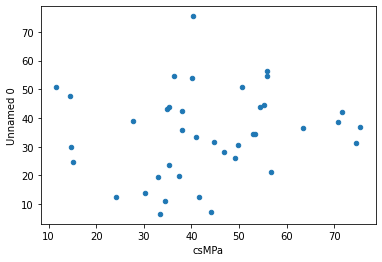

In [0]:
pd.DataFrame([y_test, y_pred_test]).T.plot.scatter(x="csMPa", y="Unnamed 0")

In [0]:
# グリッドサーチの結果、最もスコアの高いハイパーパラメータの組み合わせ
final_params = {
    'n_estimators':500, 
    'max_depth':6,
    'min_child_weight':10,
    'gamma':0.1,
    'colsample_bytree':.5,
    'subsample':.8,
    'reg_alpha':0,
    'reg_lambda':1,
    'learning_rate':.1
}

In [0]:
# 最適化されたハイパーパラメータを使ってモデル訓練
xgboost_opt = XGBRegressor(**final_params, seed=42)
xgboost_opt.fit(X_train, y_train)

[12:26:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=10, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.8, verbosity=1)

In [0]:
# テストデータの推測値を算出
y_pred_opt = xgboost_opt.predict(X_test)

# 最適化されたモデルのRMSEを算出
sqrt(mean_squared_error(y_test, y_pred_opt))

4.189909354263601

In [0]:
# データ解析のライブラリ
import pandas as pd
import numpy as np 

# データ可視化のライブラリ
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline 

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV


# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload() 

Saving glass.csv to glass (1).csv


In [0]:
# CSVファイルの読み込み
glass = pd.read_csv('glass.csv')

# 最初の5行を表示
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [0]:
# index 0のNa〜Feまでの操作を計算
print(glass.iloc[0][1:-1].sum())

# index 1のNa〜Feまでの操作を計算
print(glass.iloc[1][1:-1].sum())

99.82
99.89000000000001


In [0]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Glass Type Counts')

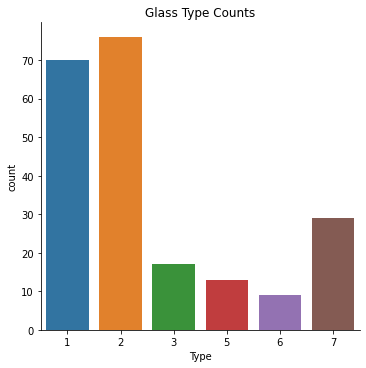

In [0]:
# ターゲットクラスの分布を確認
sns.factorplot(x = 'Type', kind='count', data = glass)
plt.title('Glass Type Counts')

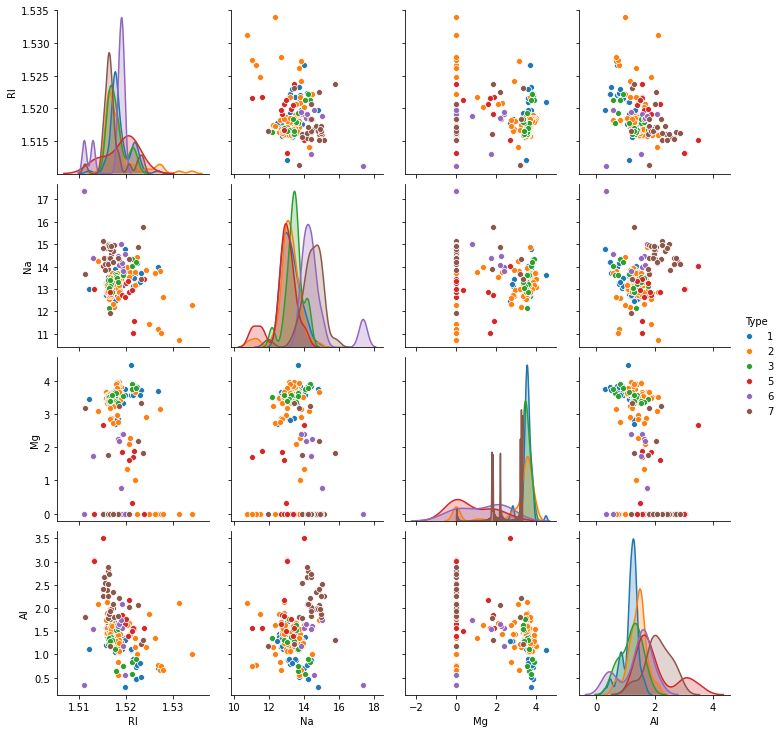

In [0]:
# 散布図行列をプロット
sns.pairplot(glass[['RI', 'Na', 'Mg', 'Al', 'Type']], hue='Type')

In [0]:
# 散布図行列をプロット
sns.pairplot(glass[['Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']], hue='Type')

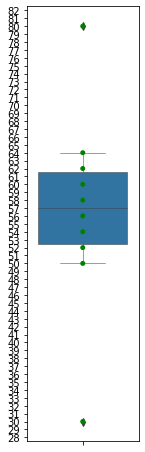

In [0]:
# 例題のデータで箱ひげ図をプロット
box_num = np.array([30, 50, 52, 54, 56, 58, 60, 62, 64, 80])
plt.figure(figsize=(2, 8))
ylabel = np.arange(0,100,1)
ax = sns.boxplot(y =box_num, linewidth=0.5 ).set_yticks(ylabel.tolist())
plt.rc('ytick',labelsize=8)
ax = sns.swarmplot(y = box_num, color='green')

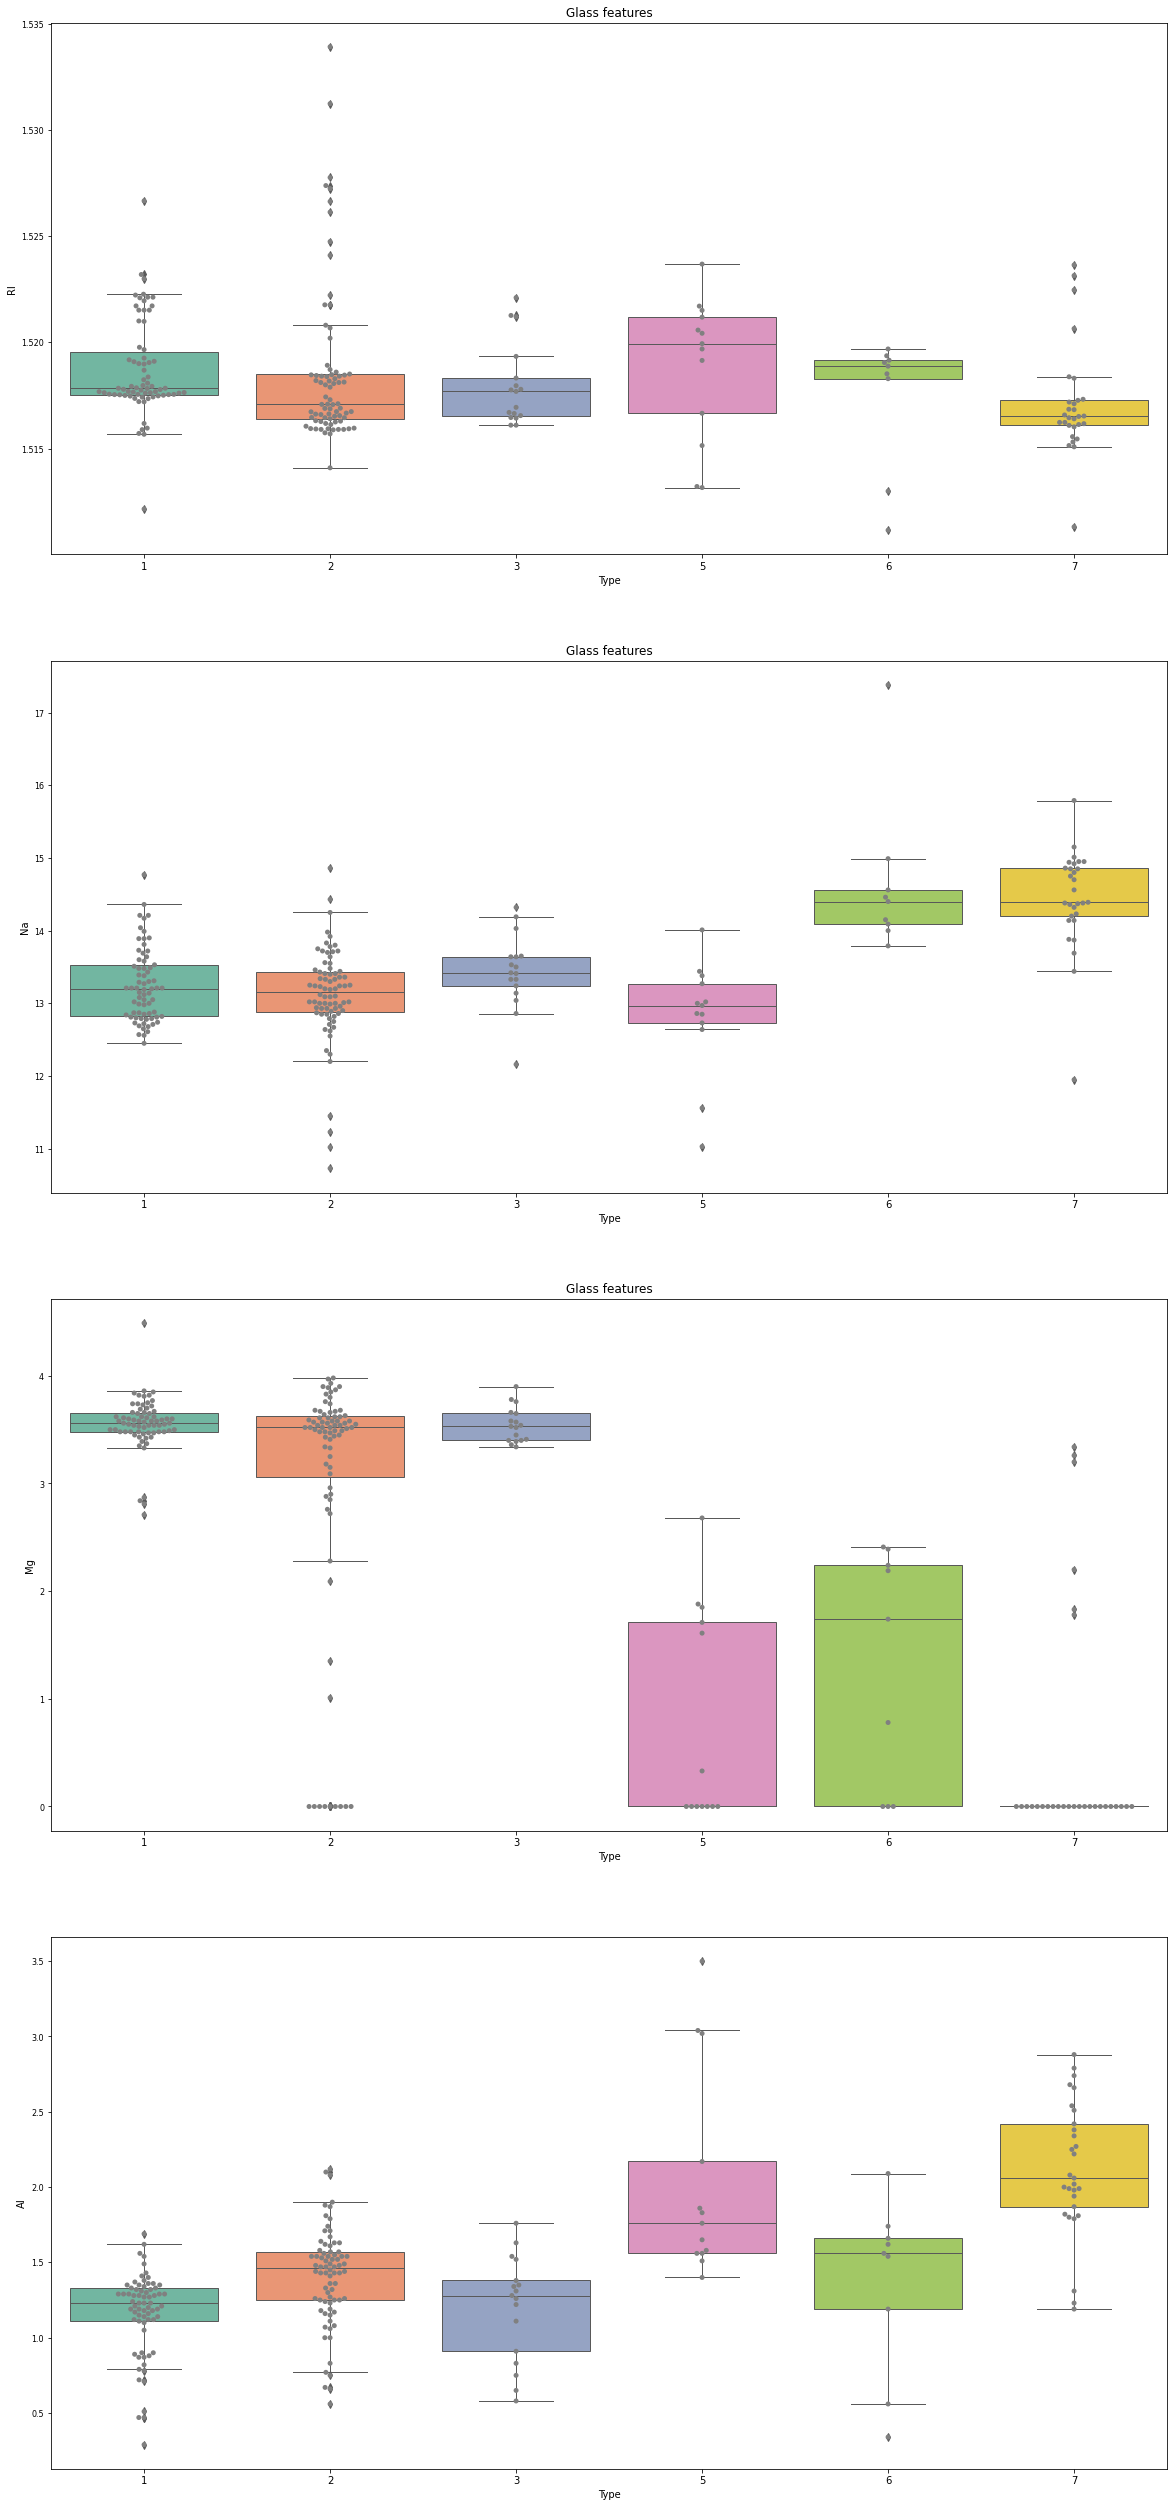

In [0]:
features = glass.iloc[:,0:4].columns

plt.figure(figsize=(20,9*5))
gs = gridspec.GridSpec(4, 1)
for i, col in enumerate(glass[features]):
    plt.title('Glass features')
    ax = plt.subplot(gs[i])
    sns.boxplot(x= glass['Type'], y=glass[col], palette='Set2', linewidth=1.0)
    sns.swarmplot(x=glass['Type'], y=glass[col], color=".5")

In [0]:
# 訓練・テストデータの分割
train_set, test_set = train_test_split(glass, test_size=.2, random_state= 42)

In [0]:
# 訓練データの特徴量・ターゲット
X_train = train_set.drop('Type',axis=1)
y_train = train_set['Type'].copy()

# テストデータの特徴量・ターゲット
X_test = test_set.drop('Type',axis=1)
y_test = test_set['Type'].copy()

In [0]:
# ロジスティック回帰のモデル訓練
LR = LogisticRegression(random_state=42)
LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# テストデータの推測と評価（ロジスティック回帰）
LR_pred_test = LR.predict(X_test)

In [0]:
# 混同行列を表示
confusion_matrix(y_test, LR_pred_test)

array([[ 9,  2,  0,  0,  0,  0],
       [ 2, 12,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  8]])

In [0]:
# 正解率を表示
accuracy_score(y_test, LR_pred_test)

0.7209302325581395

In [0]:
# ランダムフォレスト
RF = RandomForestClassifier(random_state=42)

In [0]:
# ハイパーパラメータの交差検証
param_grid = [{
    'n_estimators':[5, 10, 50, 100],
    'min_samples_split': [2,5,10],
    'bootstrap':['Auto','sqrt'],
    'min_samples_leaf': [1,5,10],
    'max_depth':[10,50,90],
    'max_features':['auto','sqrt'],
    'random_state':[42]
}]

In [0]:
# グリッドサーチCVで交差検証
RF_CV = GridSearchCV(estimator = RF,param_grid = param_grid, cv = 5)
RF_CV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [0]:
# テストデータの推測と評価（ランダムフォレスト回帰）
RF_pred_test = RF_CV.predict(X_test)

In [0]:
# 混同行列を表示m
confusion_matrix(y_test, RF_pred_test)

array([[11,  0,  0,  0,  0,  0],
       [ 4, 10,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  8]])

In [0]:
# 正解率を表示
accuracy_score(y_test, RF_pred_test)

0.8604651162790697